# Website Traffic Forecasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


### Converting the Date column

In [2]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


### The daily traffic of the website

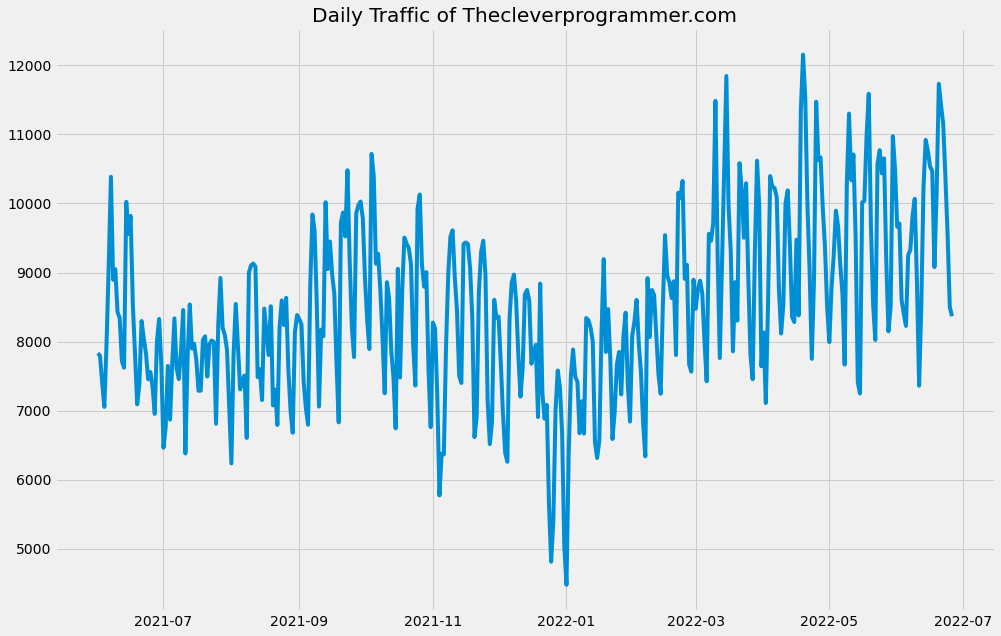

In [3]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 432x288 with 0 Axes>

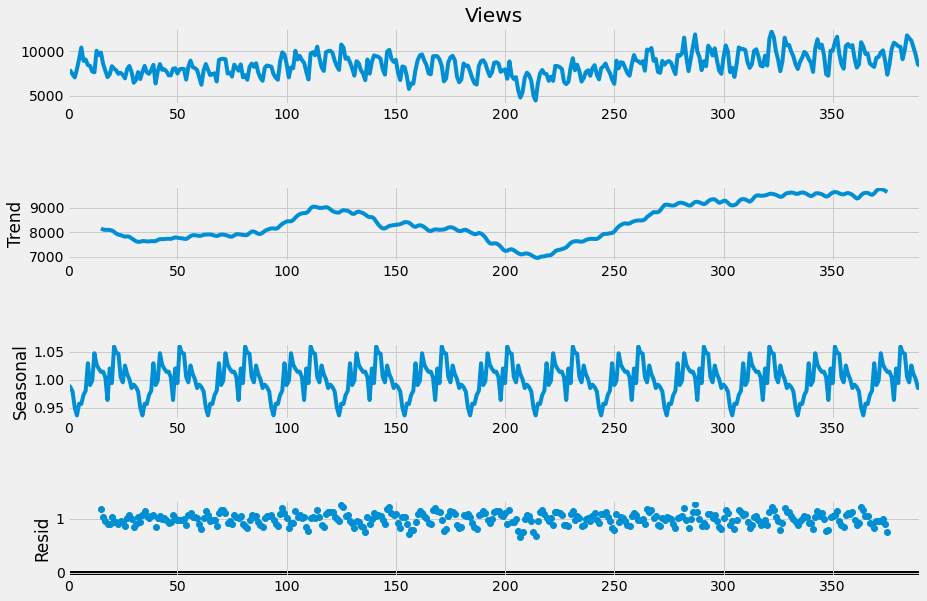

In [4]:
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

Before using the SARIMA model, it is necessary to find the p, d, and q values.
As the data is not stationary, the value of d is 1. 
To find the values of p and q, we can use the autocorrelation and partial autocorrelation plots:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

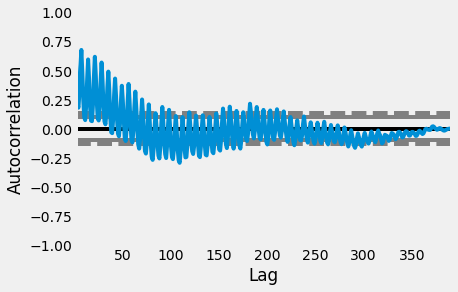

In [5]:
pd.plotting.autocorrelation_plot(data["Views"])

p = 5

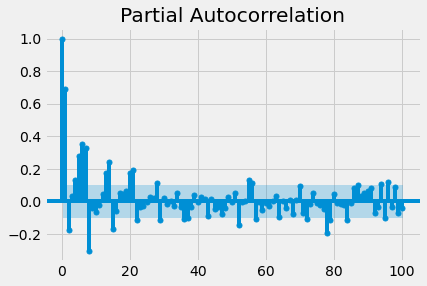

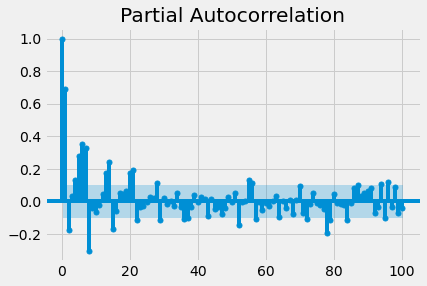

In [6]:
plot_pacf(data["Views"], lags = 100)

q = 2

### Train a SARIMA model for the task of website traffic forecasting

In [7]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26940D+00    |proj g|=  5.28062D-01


 This problem is unconstrained.



At iterate    5    f=  8.06764D+00    |proj g|=  4.51780D-02

At iterate   10    f=  8.01428D+00    |proj g|=  4.59156D-02

At iterate   15    f=  7.98073D+00    |proj g|=  1.14090D-01

At iterate   20    f=  7.96097D+00    |proj g|=  1.73116D-02

At iterate   25    f=  7.95078D+00    |proj g|=  2.22055D-01

At iterate   30    f=  7.94313D+00    |proj g|=  1.85584D-01

At iterate   35    f=  7.93775D+00    |proj g|=  1.41736D-02

At iterate   40    f=  7.93363D+00    |proj g|=  1.70166D-02

At iterate   45    f=  7.93008D+00    |proj g|=  7.14906D-02

At iterate   50    f=  7.92658D+00    |proj g|=  2.46712D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

### Forecast traffic on the website for the next 50 days:

In [8]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9911.945610
392    10896.188295
393    10713.698416
394     9784.002855
395     8820.189481
396     8324.443888
397     8970.377025
398     9785.552110
399    10375.566268
400    10548.965826
401     9808.153238
402     9289.332559
403     9022.984892
404     9104.568445
405    10540.215606
406    11034.179464
407    10867.318402
408    10019.240804
409     9388.818051
410     8629.768018
411     9179.583275
412    10413.533462
413    10734.200217
414    10826.729900
415    10230.247812
416     9399.629015
417     9024.264510
418     9236.112568
419    10089.720007
420    10418.331775
421    10760.292345
422     9880.246892
423     9509.728436
424     9001.233108
425     8911.310773
426    10254.767299
427    10958.118803
428    10900.976510
429    10274.267366
430     9348.150239
431     8646.021179
432     8740.876392
433    10179.374330
434    10614.601960
435    10847.405617
436    10359.383148
437     9278.019343
438     9202.359304
439     9469.088235
440    10430.428233


### Plot the predictions

<AxesSubplot:>

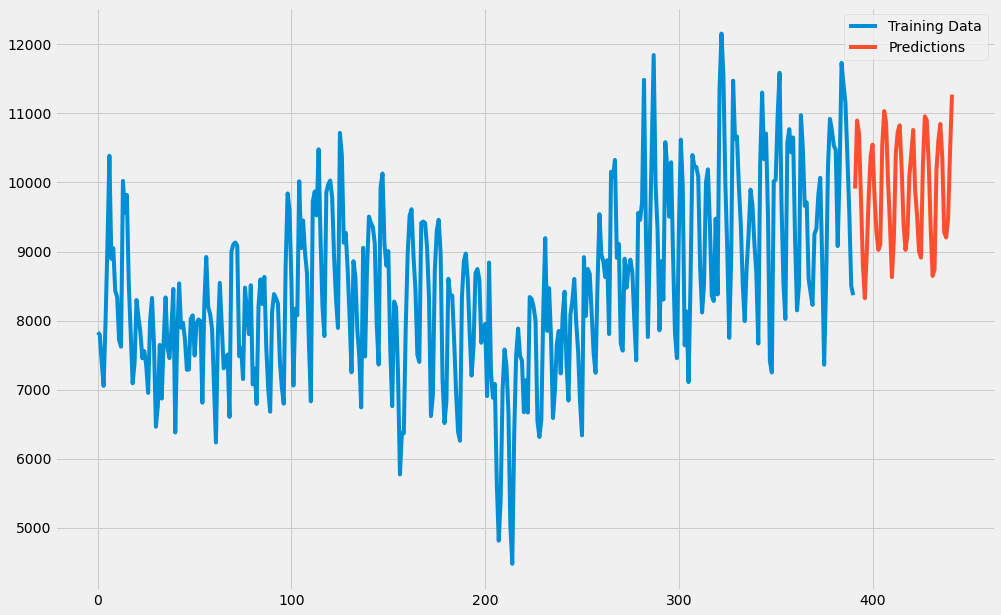

In [9]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")